In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
df = pd.read_csv('Generated.t4.bench',sep=" ")
#df = pd.read_csv('generatedData_bench_100iter.csv')
cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)
df['maxTime']=df[cols].max(axis=1)
df

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,val_18,val_19,val_20,val_21,val_22,val_23,val_24,val_25,minTime,maxTime
0,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,kendall,7.621185e+06,1.448788e+06,1.454826e+07,7.146085e+06,7.471550e+06,7.480540e+06,...,7.322697e+06,7.360821e+06,7.138419e+06,7.328314e+06,7.352950e+06,7.291513e+06,7.263948e+06,7.390584e+06,7.128458e+06,1.454826e+07
1,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,euclidean,1.107941e+06,1.498401e+06,8.300060e+06,8.431038e+05,8.089358e+05,8.124740e+05,...,8.063292e+05,8.058725e+05,8.299372e+05,8.088935e+05,8.062985e+05,7.965802e+05,7.957758e+05,8.003650e+05,7.957758e+05,8.300060e+06
2,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,pearson,4.610702e+06,1.501138e+06,1.181592e+07,4.346568e+06,4.312414e+06,4.337095e+06,...,4.308699e+06,4.302000e+06,4.301722e+06,4.300442e+06,4.299258e+06,4.305750e+06,4.300314e+06,4.302512e+06,4.299258e+06,1.181592e+07
3,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,kendall,6.784365e+06,1.524808e+06,1.409411e+07,6.623970e+06,6.440376e+06,6.510551e+06,...,6.526530e+06,6.426783e+06,6.513444e+06,6.453994e+06,6.478086e+06,6.494686e+06,6.352268e+06,6.458438e+06,6.352268e+06,1.409411e+07
4,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,euclidean,1.120901e+06,1.510871e+06,8.371800e+06,8.565832e+05,8.111990e+05,8.175290e+05,...,8.244268e+05,8.269188e+05,8.116280e+05,8.502525e+05,8.106332e+05,8.216972e+05,6.971195e+05,8.209502e+05,6.971195e+05,8.371800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,euclidean,2.983176e+06,4.091300e+03,2.994803e+06,2.989524e+06,2.985112e+06,2.983812e+06,...,2.980404e+06,2.979734e+06,2.980191e+06,2.980322e+06,2.980432e+06,2.980612e+06,2.980344e+06,2.980402e+06,2.979734e+06,2.994803e+06
367,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,euclidean,3.005050e+06,1.098391e+04,3.045682e+06,3.011877e+06,3.010239e+06,3.004377e+06,...,2.999304e+06,2.999581e+06,3.000606e+06,2.999703e+06,2.999968e+06,2.999623e+06,2.999200e+06,3.000372e+06,2.999141e+06,3.045682e+06
368,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,kendall,5.488770e+09,1.466998e+06,5.492590e+09,5.488601e+09,5.487905e+09,5.487932e+09,...,5.487244e+09,5.488047e+09,5.487239e+09,5.487015e+09,5.487073e+09,5.489022e+09,5.489483e+09,5.488489e+09,5.487015e+09,5.492590e+09
369,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,kendall,5.968095e+09,1.381117e+06,5.968258e+09,5.968749e+09,5.968837e+09,5.969087e+09,...,5.967933e+09,5.968225e+09,5.969513e+09,5.967735e+09,5.967151e+09,5.968302e+09,5.971056e+09,5.971609e+09,5.965351e+09,5.971056e+09


In [3]:
weight=[]
unID=[]
w1=[]
w2=[]
w3 = []
w4= []
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-3].split('_')
    l = (i.split('/')[-3])
    j=i.split('/')[-1][:-4]
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))
    w3.append(float(j))
    w4.append(l)

df['wX'] = w1
df['wY'] = w2
df['sparsity'] = w3
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
df['id'] = w4
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
df['logMaxTime']=np.log10(df['maxTime'])
df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
df

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,wY,sparsity,logWX,logWY,id,logMeanTime,logMinTime,logMaxTime,|W|,Method
0,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,kendall,7.621185e+06,1.448788e+06,1.454826e+07,7.146085e+06,7.471550e+06,7.480540e+06,...,1000,0.50,3.0,3.0,1000_cells_1000_genes,6.882022,6.852996,7.162811,1000000,kendall_GPU
1,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,euclidean,1.107941e+06,1.498401e+06,8.300060e+06,8.431038e+05,8.089358e+05,8.124740e+05,...,1000,0.50,3.0,3.0,1000_cells_1000_genes,6.044517,5.900791,6.919081,1000000,euclidean_GPU
2,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,pearson,4.610702e+06,1.501138e+06,1.181592e+07,4.346568e+06,4.312414e+06,4.337095e+06,...,1000,0.50,3.0,3.0,1000_cells_1000_genes,6.663767,6.633393,7.072468,1000000,pearson_GPU
3,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,kendall,6.784365e+06,1.524808e+06,1.409411e+07,6.623970e+06,6.440376e+06,6.510551e+06,...,1000,0.75,3.0,3.0,1000_cells_1000_genes,6.831509,6.802929,7.149038,1000000,kendall_GPU
4,../../DistanceBenchmarking/GeneratedSparse/100...,GPU,100,euclidean,1.120901e+06,1.510871e+06,8.371800e+06,8.565832e+05,8.111990e+05,8.175290e+05,...,1000,0.75,3.0,3.0,1000_cells_1000_genes,6.049567,5.843307,6.922819,1000000,euclidean_GPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,euclidean,2.983176e+06,4.091300e+03,2.994803e+06,2.989524e+06,2.985112e+06,2.983812e+06,...,100,0.99,5.0,2.0,100000_cells_100_genes,6.474679,6.474177,6.476368,10000000,euclidean_factoextra
367,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,euclidean,3.005050e+06,1.098391e+04,3.045682e+06,3.011877e+06,3.010239e+06,3.004377e+06,...,100,0.90,5.0,2.0,100000_cells_100_genes,6.477852,6.476997,6.483685,10000000,euclidean_factoextra
368,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,kendall,5.488770e+09,1.466998e+06,5.492590e+09,5.488601e+09,5.487905e+09,5.487932e+09,...,10,0.99,5.0,1.0,100000_cells_10_genes,9.739475,9.739336,9.739777,1000000,kendall_factoextra
369,../../DistanceBenchmarking/GeneratedSparse/100...,factoextra,100,kendall,5.968095e+09,1.381117e+06,5.968258e+09,5.968749e+09,5.968837e+09,5.969087e+09,...,10,0.95,5.0,1.0,100000_cells_10_genes,9.775836,9.775636,9.776051,1000000,kendall_factoextra


In [4]:
#df.to_csv('generated_without_sparsity.csv')

<AxesSubplot:xlabel='sparsity', ylabel='logMeanTime'>

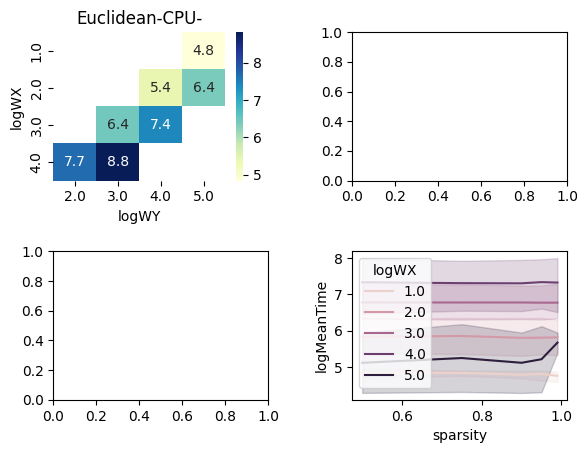

In [5]:
matrix = df[df['metric']=="pearson"]
matrix1= matrix[matrix["sparsity"]==0.50]
matrix1 = matrix1[matrix1["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')


fig, axs = plt.subplots(nrows=2,ncols=2)
plt.tight_layout(pad=3.0)
sns.heatmap(matrix1, cmap="YlGnBu", annot=True,ax=axs[0][0]).set_title("Euclidean-CPU-")
#sns.lineplot(x="sparsity", y="logMeanTime",
#             hue="logWX", #style="event",
#             data=matrix,ax=axs[0][1])
sns.lineplot(x="sparsity", y="logMeanTime",
             hue="logWX", #style="event",
             data=matrix)

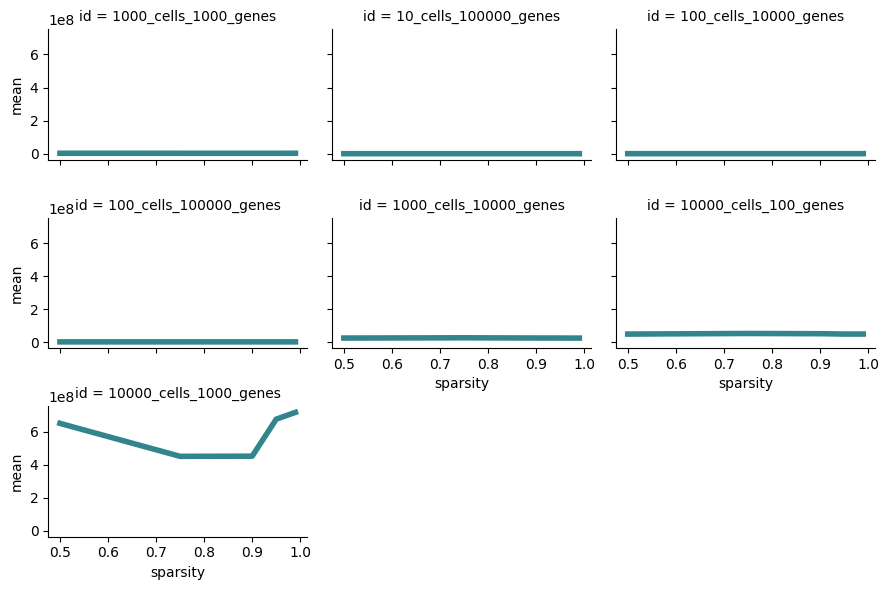

In [6]:
matrix = df[df['metric']=="pearson"]
matrix = matrix[matrix['method']=='CPU']
g = sns.relplot(
    data=matrix,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [7]:
df = pd.read_csv('Generated.t5.bench',sep=" ")
#df = pd.read_csv('generatedData_bench_100iter.csv')
cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)
df['maxTime']=df[cols].max(axis=1)
weight=[]
unID=[]
w1=[]
w2=[]
w3 = []
w4= []
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-2].split('_')
    j=i.split('/')[-1][:-4]
    l = (i.split('/')[-2])
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))
    w3.append(float(j))
    w4.append(l)

df['wX'] = w1
df['wY'] = w2
df['sparsity'] = w3
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
df['id'] = w4
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
df['logMaxTime']=np.log10(df['maxTime'])
df['invSparsity']=np.log10(1-df['sparsity'])
df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
df

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,sparsity,logWX,logWY,id,logMeanTime,logMinTime,logMaxTime,invSparsity,|W|,Method
0,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,6.373376e+04,7.106440e+04,4.827575e+04,1.114865e+05,2.322845e+05,2.547625e+04,...,0.99,3.0,3.0,1000_cells_1000_genes,4.804370,4.283256,5.366020,-2.00000,1000000,pearson_CPU_Sp
1,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,6.995854e+04,6.876221e+04,5.212450e+04,1.058560e+05,1.830938e+05,3.089800e+04,...,0.95,3.0,3.0,1000_cells_1000_genes,4.844841,4.424502,5.340164,-1.30103,1000000,pearson_CPU_Sp
2,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,7.861751e+04,8.368728e+04,5.944550e+04,1.202570e+05,2.277360e+05,3.619075e+04,...,0.99,3.0,3.0,1000_cells_1000_genes,4.895519,4.443693,5.435588,-2.00000,1000000,euclidean_CPU_Sp
3,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,9.448525e+04,7.781663e+04,6.888225e+04,1.050982e+05,2.055892e+05,5.563100e+04,...,0.90,3.0,3.0,1000_cells_1000_genes,4.975364,4.554625,5.398681,-1.00000,1000000,pearson_CPU_Sp
4,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,1.385290e+05,7.370320e+04,1.308148e+05,2.398278e+05,2.858022e+05,9.634875e+04,...,0.95,3.0,3.0,1000_cells_1000_genes,5.141541,4.946840,5.456802,-1.30103,1000000,euclidean_CPU_Sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,4.817599e+07,8.554826e+06,4.598121e+07,4.191384e+07,5.285951e+07,5.130624e+07,...,0.95,3.0,4.0,1000_cells_10000_genes,7.682831,7.615695,7.872543,-1.30103,10000000,euclidean_CPU_Sp
86,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,7.134775e+07,9.993926e+06,9.768541e+07,1.017334e+08,8.965481e+07,7.300138e+07,...,0.90,3.0,4.0,1000_cells_10000_genes,7.853380,7.817621,8.007464,-1.00000,10000000,euclidean_CPU_Sp
87,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,8.157149e+07,4.065022e+06,8.440614e+07,8.362546e+07,7.968925e+07,8.126578e+07,...,0.50,3.0,4.0,1000_cells_10000_genes,7.911538,7.878566,7.966874,-0.30103,10000000,pearson_CPU_Sp
88,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,1.436580e+08,1.815745e+07,1.544098e+08,2.137308e+08,1.403733e+08,1.808756e+08,...,0.75,3.0,4.0,1000_cells_10000_genes,8.157330,8.119248,8.329867,-0.60206,10000000,euclidean_CPU_Sp


In [8]:
#df.to_csv('generated_with_sparsity.csv')

In [9]:
matrix_sp = df[df['metric']=="pearson"]
matrix_sp = matrix_sp[matrix_sp['method']=='CPU_Sp']
#matrix1= matrix[matrix["sparsity"]==0.50]
matrix_sp
#matrix1 = matrix1[matrix1["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')


# fig, axs = plt.subplots(nrows=2,ncols=2)
# plt.tight_layout(pad=3.0)
# sns.heatmap(matrix1, cmap="YlGnBu", annot=True,ax=axs[0][0]).set_title("Euclidean-CPU-")
# #sns.lineplot(x="sparsity", y="logMeanTime",
# #             hue="logWX", #style="event",
# #             data=matrix,ax=axs[0][1])
# sns.lineplot(x="sparsity", y="logMeanTime",
#              hue="logWX", #style="event",
#              data=matrix)

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,sparsity,logWX,logWY,id,logMeanTime,logMinTime,logMaxTime,invSparsity,|W|,Method
0,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,63733.76,7.106440e+04,48275.75,111486.50,232284.50,25476.25,...,0.99,3.0,3.0,1000_cells_1000_genes,4.804370,4.283256,5.366020,-2.00000,1000000,pearson_CPU_Sp
1,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,69958.54,6.876221e+04,52124.50,105856.00,183093.75,30898.00,...,0.95,3.0,3.0,1000_cells_1000_genes,4.844841,4.424502,5.340164,-1.30103,1000000,pearson_CPU_Sp
3,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,94485.25,7.781663e+04,68882.25,105098.25,205589.25,55631.00,...,0.90,3.0,3.0,1000_cells_1000_genes,4.975364,4.554625,5.398681,-1.00000,1000000,pearson_CPU_Sp
5,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,161324.75,9.704279e+04,414857.25,311513.50,312786.25,290597.00,...,0.75,3.0,3.0,1000_cells_1000_genes,5.207701,4.978216,5.617899,-0.60206,1000000,pearson_CPU_Sp
7,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,383282.37,1.316565e+05,853459.75,517742.50,472182.50,297051.75,...,0.50,3.0,3.0,1000_cells_1000_genes,5.583519,5.429762,5.931183,-0.30103,1000000,pearson_CPU_Sp
11,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,57861.52,4.860106e+04,47283.25,180145.00,35124.00,130181.25,...,0.95,3.0,3.0,1000_cells_1000_genes,4.762390,4.379799,5.255622,-1.30103,1000000,pearson_CPU_Sp
12,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,52414.66,5.385835e+04,41903.00,80397.50,159402.00,22781.75,...,0.99,3.0,3.0,1000_cells_1000_genes,4.719453,4.264570,5.210756,-2.00000,1000000,pearson_CPU_Sp
13,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,75447.24,5.249101e+04,60340.25,86884.50,155113.25,46495.25,...,0.90,3.0,3.0,1000_cells_1000_genes,4.877643,4.540367,5.220359,-1.00000,1000000,pearson_CPU_Sp
15,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,125719.55,5.772407e+04,266714.50,206979.75,214660.75,206072.25,...,0.75,3.0,3.0,1000_cells_1000_genes,5.099403,4.938552,5.426047,-0.60206,1000000,pearson_CPU_Sp
17,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,320286.03,6.981574e+04,538112.25,367205.50,370876.25,260156.75,...,0.50,3.0,3.0,1000_cells_1000_genes,5.505538,5.400865,5.730873,-0.30103,1000000,pearson_CPU_Sp


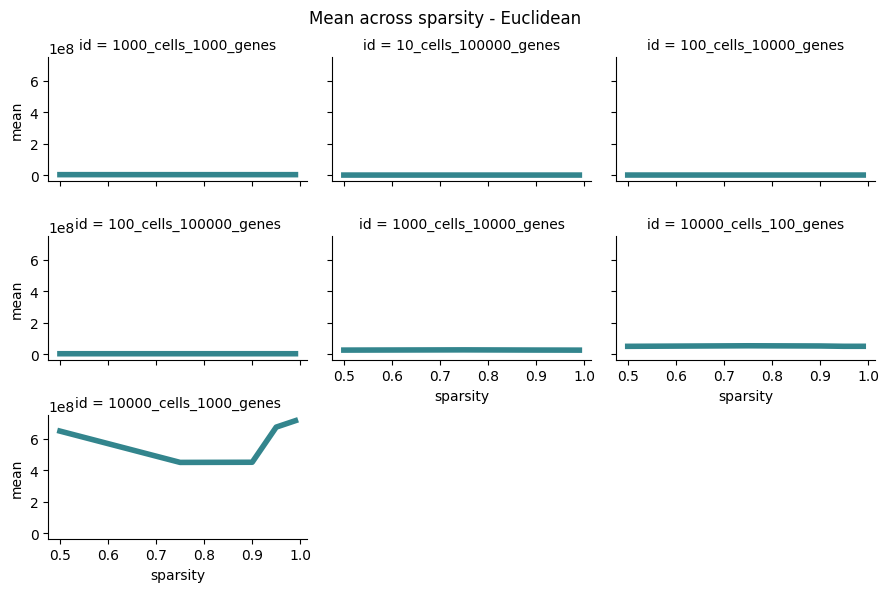

In [10]:
g = sns.relplot(
    data=matrix,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
g.fig.suptitle('Mean across sparsity - Euclidean', fontsize=12)
g.fig.subplots_adjust(top=0.9);

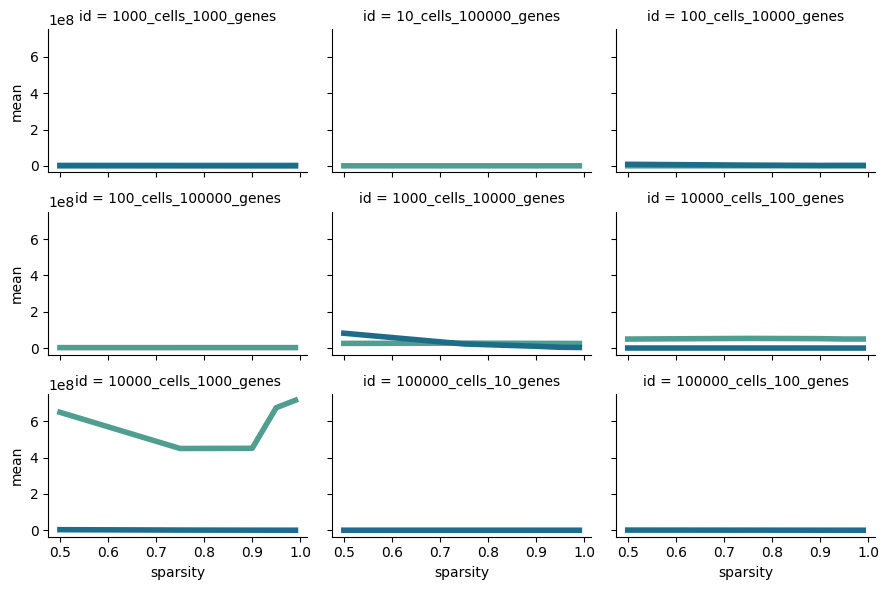

In [11]:
matrix = matrix.append(matrix_sp)
g = sns.relplot(
    data=matrix,
    x="sparsity", y="mean", col="id", hue="method",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [12]:
matrix

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,sparsity,logWX,logWY,id,logMeanTime,logMinTime,logMaxTime,|W|,Method,invSparsity
32,../../DistanceBenchmarking/GeneratedSparse/100...,CPU,100,pearson,2702028.65,3.195064e+05,3691310.50,3039853.75,3647316.00,2574368.25,...,0.50,3.0,3.0,1000_cells_1000_genes,6.431690,6.396197,6.567181,1000000,pearson_CPU,NaN
35,../../DistanceBenchmarking/GeneratedSparse/100...,CPU,100,pearson,2626039.50,7.452660e+04,2762594.25,2618154.50,2624524.75,2768850.50,...,0.75,3.0,3.0,1000_cells_1000_genes,6.419301,6.397404,6.442300,1000000,pearson_CPU,NaN
38,../../DistanceBenchmarking/GeneratedSparse/100...,CPU,100,pearson,2583277.50,8.013915e+04,2788513.25,2532512.00,2585982.50,2543845.50,...,0.95,3.0,3.0,1000_cells_1000_genes,6.412171,6.396764,6.445373,1000000,pearson_CPU,NaN
41,../../DistanceBenchmarking/GeneratedSparse/100...,CPU,100,pearson,2684489.18,4.337816e+05,4728872.00,2576250.25,2515585.00,2687737.00,...,0.99,3.0,3.0,1000_cells_1000_genes,6.428862,6.400531,6.674758,1000000,pearson_CPU,NaN
44,../../DistanceBenchmarking/GeneratedSparse/100...,CPU,100,pearson,2612739.13,1.521875e+05,3202575.50,2578283.25,2670545.00,2510112.25,...,0.90,3.0,3.0,1000_cells_1000_genes,6.417096,6.382724,6.505499,1000000,pearson_CPU,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,151821.66,9.421821e+04,522441.25,201163.00,197792.25,206646.75,...,0.90,5.0,2.0,100000_cells_100_genes,5.181334,4.955828,5.718037,10000000,pearson_CPU_Sp,-1.00000
75,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,2964472.92,3.959562e+05,3514572.25,3142321.75,2906194.50,2881593.00,...,0.50,4.0,3.0,10000_cells_1000_genes,6.471947,6.416651,6.627418,10000000,pearson_CPU_Sp,-0.30103
79,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,9682608.53,9.990549e+05,8409367.75,8354638.25,7911415.50,10168358.00,...,0.90,3.0,4.0,1000_cells_10000_genes,6.985992,6.898254,7.061840,10000000,pearson_CPU_Sp,-1.00000
84,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,22438770.41,4.928453e+06,22057124.50,22986960.25,29813681.25,28125218.25,...,0.75,3.0,4.0,1000_cells_10000_genes,7.350999,7.255209,7.521845,10000000,pearson_CPU_Sp,-0.60206


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,sparsity,logWX,logWY,id,logMeanTime,logMinTime,logMaxTime,invSparsity,|W|,Method
0,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,6.373376e+04,7.106440e+04,4.827575e+04,1.114865e+05,2.322845e+05,2.547625e+04,...,0.99,3.0,3.0,1000_cells_1000_genes,4.804370,4.283256,5.366020,-2.00000,1000000,pearson_CPU_Sp
1,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,6.995854e+04,6.876221e+04,5.212450e+04,1.058560e+05,1.830938e+05,3.089800e+04,...,0.95,3.0,3.0,1000_cells_1000_genes,4.844841,4.424502,5.340164,-1.30103,1000000,pearson_CPU_Sp
2,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,7.861751e+04,8.368728e+04,5.944550e+04,1.202570e+05,2.277360e+05,3.619075e+04,...,0.99,3.0,3.0,1000_cells_1000_genes,4.895519,4.443693,5.435588,-2.00000,1000000,euclidean_CPU_Sp
3,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,9.448525e+04,7.781663e+04,6.888225e+04,1.050982e+05,2.055892e+05,5.563100e+04,...,0.90,3.0,3.0,1000_cells_1000_genes,4.975364,4.554625,5.398681,-1.00000,1000000,pearson_CPU_Sp
4,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,1.385290e+05,7.370320e+04,1.308148e+05,2.398278e+05,2.858022e+05,9.634875e+04,...,0.95,3.0,3.0,1000_cells_1000_genes,5.141541,4.946840,5.456802,-1.30103,1000000,euclidean_CPU_Sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,4.817599e+07,8.554826e+06,4.598121e+07,4.191384e+07,5.285951e+07,5.130624e+07,...,0.95,3.0,4.0,1000_cells_10000_genes,7.682831,7.615695,7.872543,-1.30103,10000000,euclidean_CPU_Sp
86,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,7.134775e+07,9.993926e+06,9.768541e+07,1.017334e+08,8.965481e+07,7.300138e+07,...,0.90,3.0,4.0,1000_cells_10000_genes,7.853380,7.817621,8.007464,-1.00000,10000000,euclidean_CPU_Sp
87,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,8.157149e+07,4.065022e+06,8.440614e+07,8.362546e+07,7.968925e+07,8.126578e+07,...,0.50,3.0,4.0,1000_cells_10000_genes,7.911538,7.878566,7.966874,-0.30103,10000000,pearson_CPU_Sp
88,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,euclidean,1.436580e+08,1.815745e+07,1.544098e+08,2.137308e+08,1.403733e+08,1.808756e+08,...,0.75,3.0,4.0,1000_cells_10000_genes,8.157330,8.119248,8.329867,-0.60206,10000000,euclidean_CPU_Sp


d:\ai-ml\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


ValueError: operands could not be broadcast together with shapes (92,) (80,) 

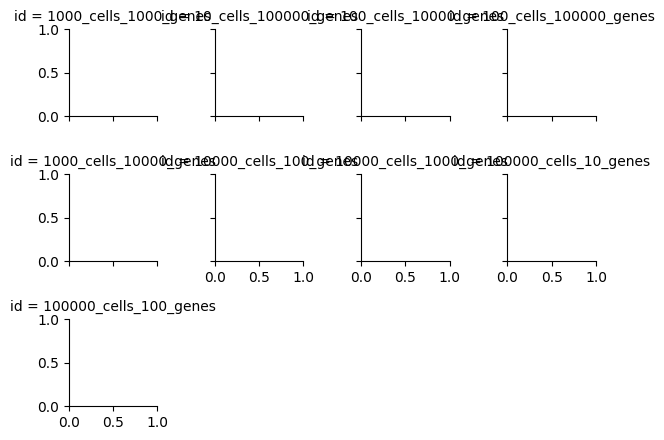

In [14]:
grid = sns.FacetGrid(matrix, col="id",hue="method", palette="tab20c",
                     col_wrap=4, height=1.5)
g.map(sns.violinplot,'sparsity','mean',
               split=True, inner="quart", linewidth=1)
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

ordered_days = sorted(tips['day'].unique())
g = sns.FacetGrid(matrix,col='id',col_wrap=2)
#                                               change this to 4 ^
g.map(sns.boxplot,'sparsity','mean',hue="method",
               split=True, inner="quart", linewidth=1)
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

In [ ]:
# tipsg = sns.PairGrid(matrix, diag_sharey=False)
# g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot, lw=2)

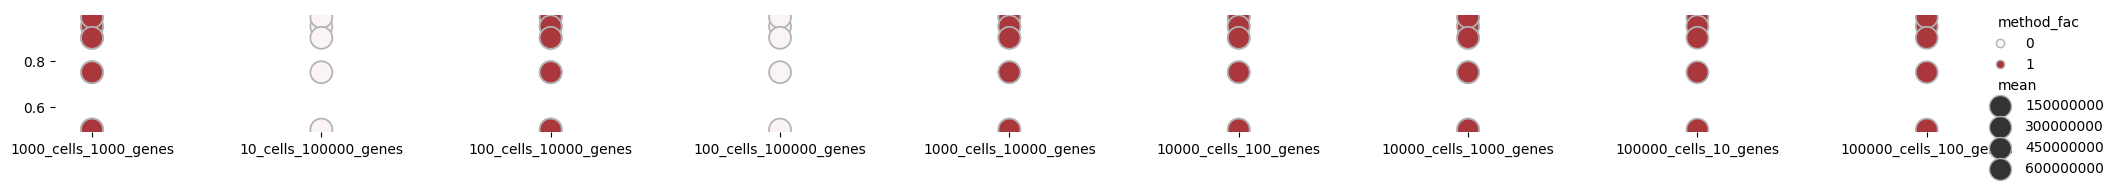

In [15]:
matrix['method_fac'] = pd.factorize(matrix['method'])[0]

g = sns.relplot(
    data=matrix,
    x="id", y="sparsity", hue="method_fac", size="mean",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=20, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)

for label in g.ax.get_xticklabels():
    label.set_rotation(0)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

Text(0.5, 1.0, 'Variation in speed across all data types on pearson metric')

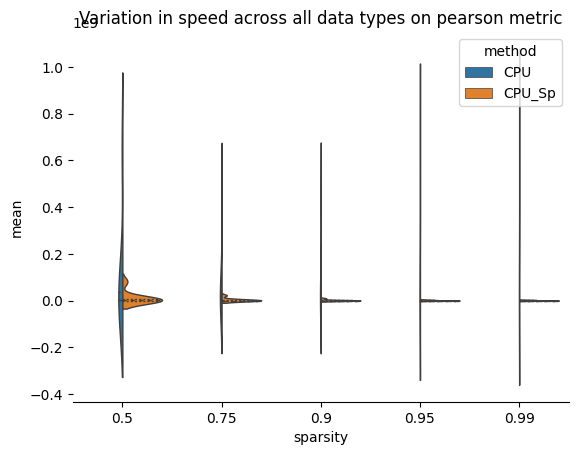

In [16]:
sns.violinplot(data=matrix, x="sparsity", y="mean", hue="method",
               split=True, inner="quart", linewidth=1)#,
               #palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)
plt.title("Variation in speed across all data types on pearson metric")

In [17]:
matrix

,DataFile,method,size,metric,mean,sd,val_1,val_2,val_3,val_4,...,logWX,logWY,id,logMeanTime,logMinTime,logMaxTime,|W|,Method,invSparsity,method_fac
32,../../DistanceBenchmarking/GeneratedSparse/100...,CPU,100,pearson,2702028.65,3.195064e+05,3691310.50,3039853.75,3647316.00,2574368.25,...,3.0,3.0,1000_cells_1000_genes,6.431690,6.396197,6.567181,1000000,pearson_CPU,NaN,0
35,../../DistanceBenchmarking/GeneratedSparse/100...,CPU,100,pearson,2626039.50,7.452660e+04,2762594.25,2618154.50,2624524.75,2768850.50,...,3.0,3.0,1000_cells_1000_genes,6.419301,6.397404,6.442300,1000000,pearson_CPU,NaN,0
38,../../DistanceBenchmarking/GeneratedSparse/100...,CPU,100,pearson,2583277.50,8.013915e+04,2788513.25,2532512.00,2585982.50,2543845.50,...,3.0,3.0,1000_cells_1000_genes,6.412171,6.396764,6.445373,1000000,pearson_CPU,NaN,0
41,../../DistanceBenchmarking/GeneratedSparse/100...,CPU,100,pearson,2684489.18,4.337816e+05,4728872.00,2576250.25,2515585.00,2687737.00,...,3.0,3.0,1000_cells_1000_genes,6.428862,6.400531,6.674758,1000000,pearson_CPU,NaN,0
44,../../DistanceBenchmarking/GeneratedSparse/100...,CPU,100,pearson,2612739.13,1.521875e+05,3202575.50,2578283.25,2670545.00,2510112.25,...,3.0,3.0,1000_cells_1000_genes,6.417096,6.382724,6.505499,1000000,pearson_CPU,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,151821.66,9.421821e+04,522441.25,201163.00,197792.25,206646.75,...,5.0,2.0,100000_cells_100_genes,5.181334,4.955828,5.718037,10000000,pearson_CPU_Sp,-1.00000,1
75,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,2964472.92,3.959562e+05,3514572.25,3142321.75,2906194.50,2881593.00,...,4.0,3.0,10000_cells_1000_genes,6.471947,6.416651,6.627418,10000000,pearson_CPU_Sp,-0.30103,1
79,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,9682608.53,9.990549e+05,8409367.75,8354638.25,7911415.50,10168358.00,...,3.0,4.0,1000_cells_10000_genes,6.985992,6.898254,7.061840,10000000,pearson_CPU_Sp,-1.00000,1
84,../../DistanceBenchmarking/GeneratedSparse/100...,CPU_Sp,100,pearson,22438770.41,4.928453e+06,22057124.50,22986960.25,29813681.25,28125218.25,...,3.0,4.0,1000_cells_10000_genes,7.350999,7.255209,7.521845,10000000,pearson_CPU_Sp,-0.60206,1


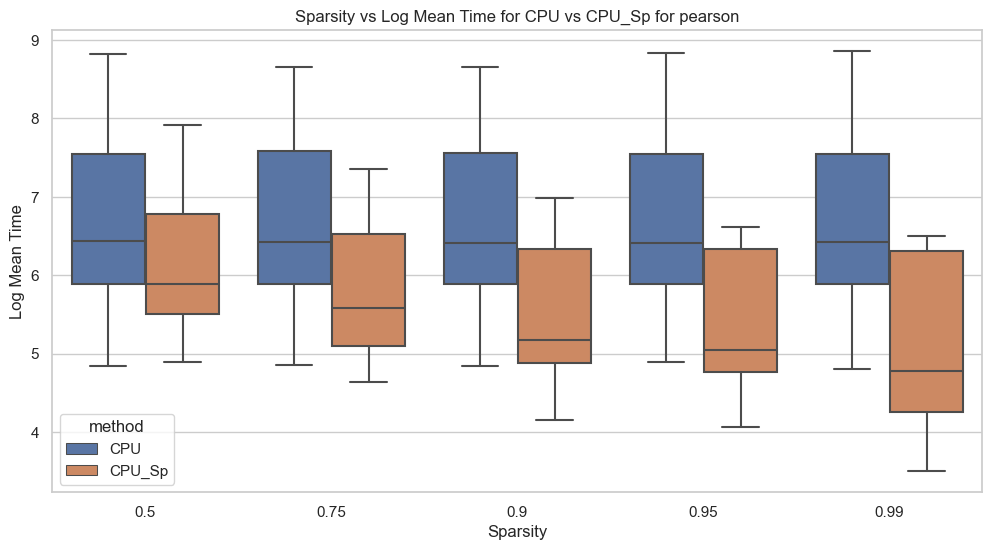

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (replace 'data.csv' with your actual data file)
data = matrix

# Filter data for CPU and CPU_Sp methods
filtered_data = data[data['method'].isin(['CPU', 'CPU_Sp'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.boxplot(x='sparsity', y='logMeanTime', hue='method', data=filtered_data)

# Add title and labels
plt.title('Sparsity vs Log Mean Time for CPU vs CPU_Sp for pearson')
plt.xlabel('Sparsity')
plt.ylabel('Log Mean Time')

# Show the plot
plt.show()


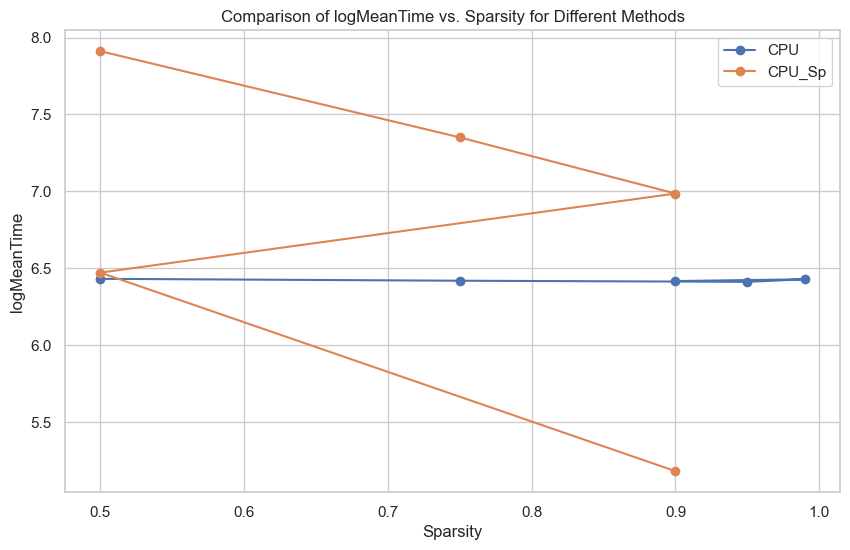

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    "DataFile": [32, 35, 38, 41, 44, 73, 75, 79, 84, 87],
    "method": ["CPU", "CPU", "CPU", "CPU", "CPU", "CPU_Sp", "CPU_Sp", "CPU_Sp", "CPU_Sp", "CPU_Sp"],
    "sparsity": [0.50, 0.75, 0.95, 0.99, 0.90, 0.90, 0.50, 0.90, 0.75, 0.50],
    "logMeanTime": [6.431690, 6.419301, 6.412171, 6.428862, 6.417096, 5.181334, 6.471947, 6.985992, 7.350999, 7.911538]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Group the data by 'method' for plotting
grouped = df.groupby('method')

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot each group
for name, group in grouped:
    plt.plot(group['sparsity'], group['logMeanTime'], marker='o', label=name)

# Add labels and title
plt.xlabel('Sparsity')
plt.ylabel('logMeanTime')
plt.title('Comparison of logMeanTime vs. Sparsity for Different Methods')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


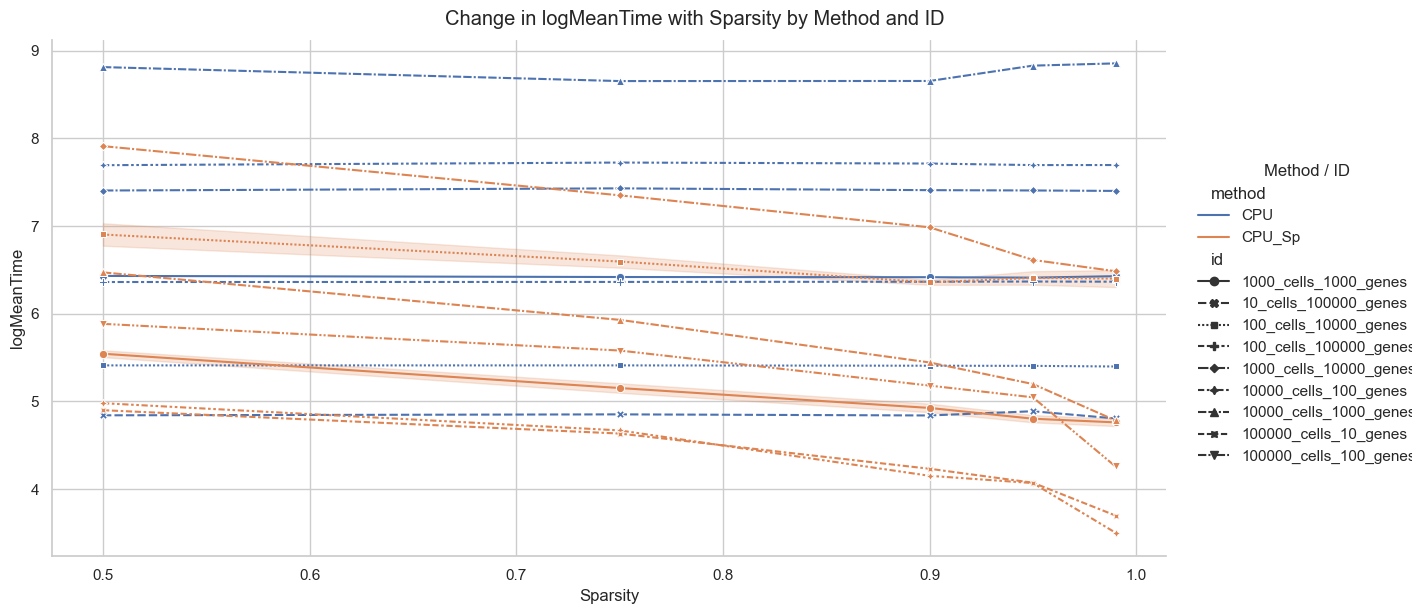

In [20]:
data_columns = ['method', 'sparsity', 'id', 'logMeanTime']
data = matrix[data_columns]

# Create the plot using Seaborn's relplot
plot = sns.relplot(
    data=data,
    x='sparsity', y='logMeanTime', hue='method',
    style='id', kind='line', markers=True,
    aspect=2, height=6
)

# Set plot title and labels
plot.fig.suptitle("Change in logMeanTime with Sparsity by Method and ID", y=1.02)
plot.set(xlabel="Sparsity", ylabel="logMeanTime")

# Customize legend position and title
plot._legend.set_bbox_to_anchor((1, 0.5))
plot._legend.set_title("Method / ID")

# Show the plot
plt.show()

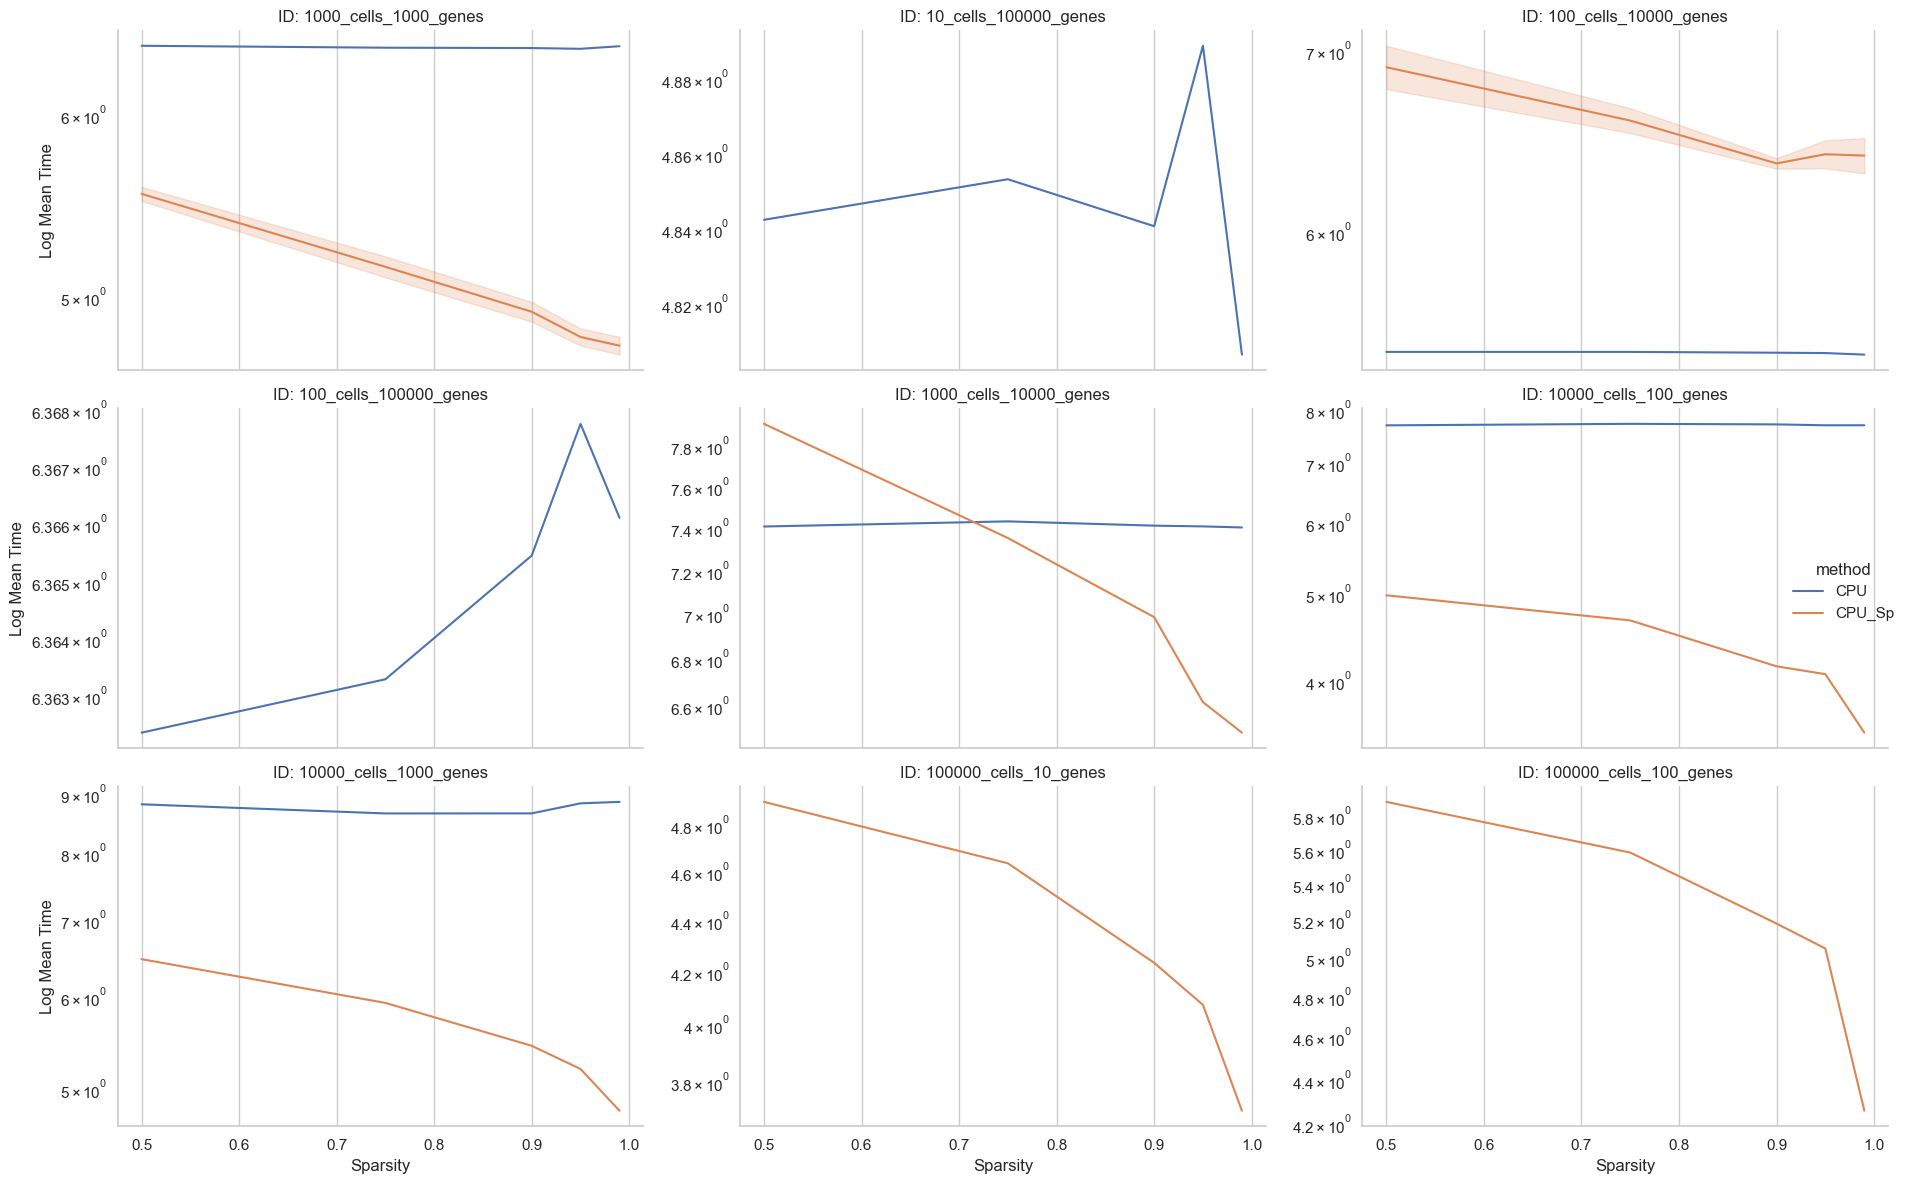

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = matrix

# Create a relplot using Seaborn
g = sns.relplot(
    data=data,
    x="sparsity",
    y="logMeanTime",
    hue="method",
    col="id",
    kind="line",
    facet_kws={"sharey": False},  # Allow different y-axes ranges for each subplot
    height=4,  # Height of each subplot
    aspect=1.5,  # Aspect ratio of each subplot
    col_wrap=3
)

# Customize plot aesthetics
g.set_axis_labels("Sparsity", "Log Mean Time")
g.set_titles("ID: {col_name}")
g.set(yscale="log")  # Set y-axis to logarithmic scale

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Filter columns of interest
data_subset = matrix[['method', 'sparsity', 'id', 'logMeanTime']]

# Create the facetgrid boxplot
g = sns.FacetGrid(data_subset, col='method', hue='id', col_wrap=3, height=4, sharey=False)
g.map(sns.boxplot, 'sparsity', 'logMeanTime')
g.set_titles("{col_name}")
g.set_axis_labels("Sparsity", "Log Mean Time")
g.add_legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



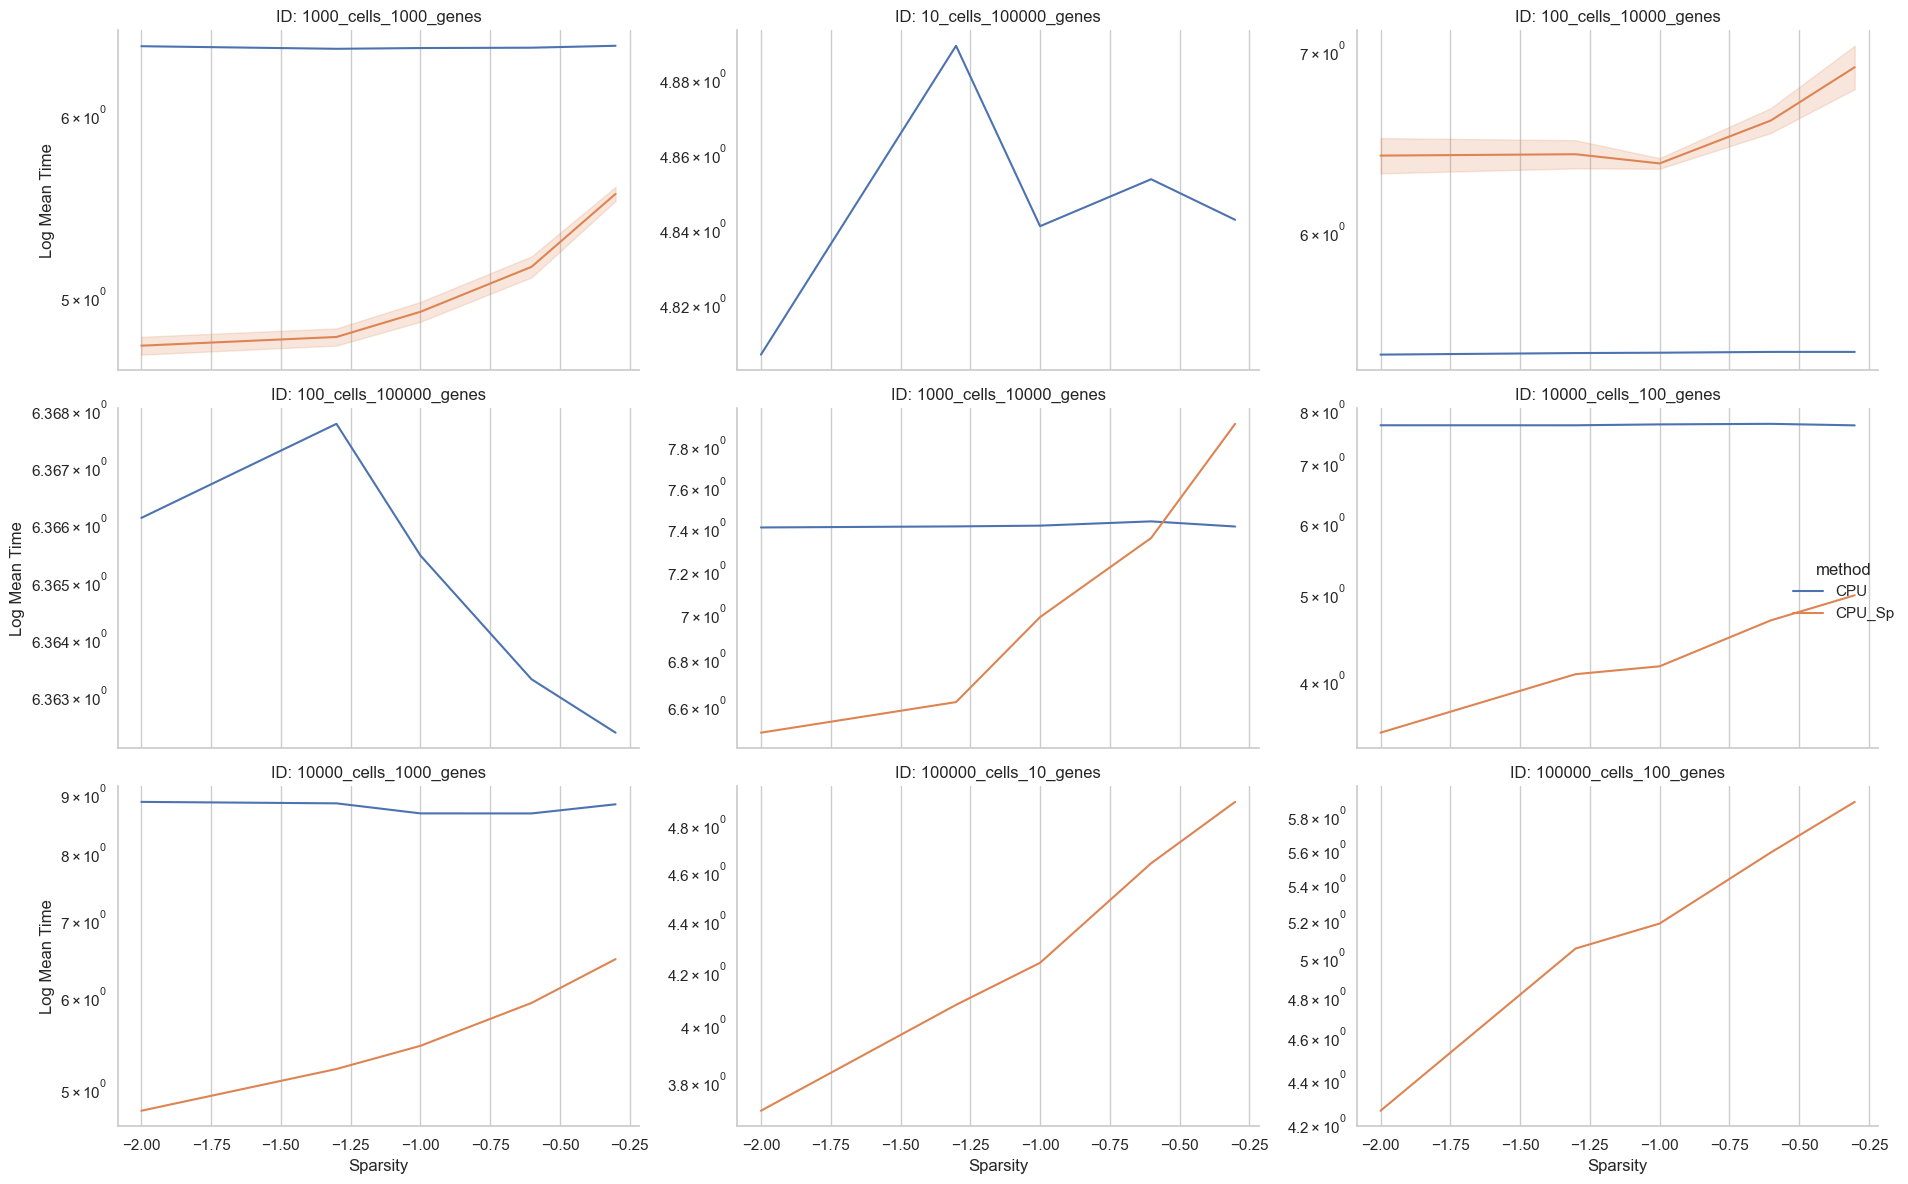

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = matrix
data['invSp'] = np.log10(1-data['sparsity'])

# Create a relplot using Seaborn
g = sns.relplot(
    data=data,
    x="invSp",
    y="logMeanTime",
    hue="method",
    col="id",
    kind="line",
    facet_kws={"sharey": False},  # Allow different y-axes ranges for each subplot
    height=4,  # Height of each subplot
    aspect=1.5,  # Aspect ratio of each subplot
    col_wrap=3
)

# Customize plot aesthetics
g.set_axis_labels("Sparsity", "Log Mean Time")
g.set_titles("ID: {col_name}")
g.set(yscale="log")  # Set y-axis to logarithmic scale

# Show the plot
plt.tight_layout()
plt.show()